In [1]:
import matplotlib
from matplotlib import transforms, pyplot as plt
import numpy as np

%matplotlib inline

import logging
logging.getLogger('matplotlib.font_manager').disabled = True

In [2]:
# define colors
GRAY1, GRAY2, GRAY3 = '#231F20', '#414040', '#555655'
GRAY4, GRAY5, GRAY6 = '#646369', '#76787B', '#828282'
GRAY7, GRAY8, GRAY9 = '#929497', '#A6A6A5', '#BFBEBE'
BLUE1, BLUE2, BLUE3, BLUE4 = '#174A7E', '#4A81BF', '#94B2D7', '#94AFC5'
RED1, RED2 = '#C3514E', '#E6BAB7'
GREEN1, GREEN2 = '#0C8040', '#9ABB59'
ORANGE1 = '#F79747'

In [3]:
# configure plot font family to Arial
plt.rcParams['font.family'] = 'Arial'
# configure mathtext bold and italic font family to Arial
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.bf'] = 'Arial:bold'
matplotlib.rcParams['mathtext.it'] = 'Arial:italic'

In [4]:
# satisfaction vs number of issues by model
X = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
Y = np.array([(73, 500), (76, 1250), (74, 970), (78, 1010),
              (84, 700), (77.5, 950), (75, 800)])

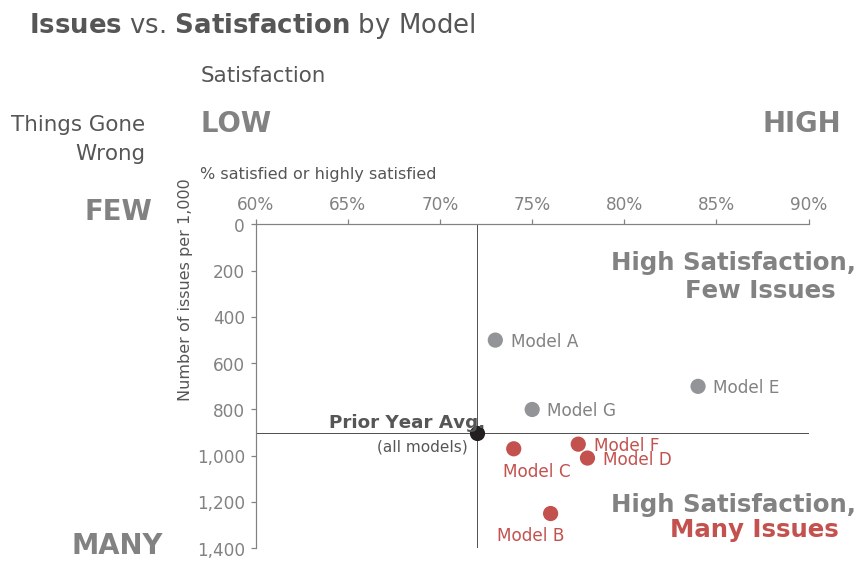

In [5]:
# create new figure
fig, ax1 = plt.subplots(figsize=(8.2, 5.4), # width, height in inches
                        dpi=110)             # resolution of the figure

# tune the subplot layout by setting sides of the figure
fig.subplots_adjust(left=0.262, right=0.875, top=0.605, bottom=0.06)

# draw colored scatterplot
colors = [GRAY7, RED1, RED1, RED1, GRAY7, RED1, GRAY7]
ax1.scatter(Y[:, 0], Y[:, 1], color=colors, s=80)

# annotate with colored labels with offsets
txt_colors = [GRAY6, RED1, RED1, RED1, GRAY6, RED1, GRAY6]
offsets = [(10, -4), (-35, -18), (-7, -18), (10, -4), 
           (10, -4), (10, -4), (10, -4)]
for i, n in enumerate(X):
    ax1.annotate('Model ' + n,               # Model X text of the annotation
                 Y[i],                       # (x,y) point to annotate
                 xytext=offsets[i],          # (x,y) to place the text at
                 textcoords='offset points', # offset (in points)
                 color=txt_colors[i],
                 fontsize=11)

# draw prior year average point
ax1.scatter([72], [900], color=GRAY1, s=80)
# draw prior year average vertical and horizontal ref lines
plt.axvline(x=72, color=GRAY1, linewidth=0.5)
plt.axhline(y=900, color=GRAY1, linewidth=0.5)
# annotate prior year average point
ax1.text(64, 880, 'Prior Year Avg.', color=GRAY3, fontsize=12, 
         fontweight='bold')
ax1.text(66.6, 980, '(all models)', color=GRAY3, fontsize=10)

# set the data limits for the y-axis and x-axis
ax1.set_xlim([60, 90])
ax1.set_ylim([0, 1400])

# invert y axis
ax1.invert_yaxis()

# set properties for axes object
xticks = list(range(60, 95, 5))    # calculate x ticks
yticks = list(range(0, 1600, 200)) # calculate y ticks
plt.setp(ax1,
         xticks=xticks,                            # set x ticks
         xticklabels=[str(i)+'%' for i in xticks], # with n% labels
         yticks=yticks)

# change the appearance of ticks, tick labels, and gridlines
ax1.tick_params(top=True, bottom=False, labelbottom=False, labeltop=True)

# set the formatter of the major ticker to split thouthands with ,
ax1.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

# remove chart border
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(False)

# configure x, y tick labels appearance
for i in ax1.get_yticklabels() + ax1.get_xticklabels():
    i.set_fontsize(11)
    i.set_color(GRAY6)

# change ticks and spines color
ax1.tick_params(color=GRAY6)
ax1.spines['top'].set_color(GRAY6)
ax1.spines['left'].set_color(GRAY6)

# add axis labels
ax1.text(55.8, 750, 'Number of issues per 1,000', color=GRAY3, 
         rotation='vertical',  fontsize=10.5)
ax1.text(57, -200, '% satisfied or highly satisfied', color=GRAY3, 
         fontsize=10.5)

kw = {'fontweight': 'bold'}
# add more information text
ax1.text(79.3, 195, 'High Satisfaction,', fontsize='16', color=GRAY6, **kw) 
ax1.text(83.3, 315, 'Few Issues', fontsize='16', color=GRAY6, **kw)
ax1.text(79.3, 1240, 'High Satisfaction,', fontsize='16', color=GRAY6, **kw)
ax1.text(82.5, 1350, 'Many Issues', fontsize='16', color=RED1, **kw)
ax1.text(50.7, -20, 'FEW', fontsize='18', color=GRAY6, **kw)
ax1.text(87.5, -400, 'HIGH', fontsize='18', color=GRAY6, **kw)
ax1.text(57, -400, 'LOW', fontsize='18', color=GRAY6, **kw)
ax1.text(50, 1425, 'MANY', fontsize='18', color=GRAY6, **kw)
ax1.text(54, -280, 'Things Gone\nWrong', color=GRAY3, fontsize=14, 
         horizontalalignment='right', linespacing=1.6)
ax1.text(57, -620, 'Satisfaction', color=GRAY3, fontsize=14)

# title the plot
ax1.text(47.7, -830, '$\\bf{Issues}$ vs. $\\bf{Satisfaction}$ by Model', color=GRAY3, fontsize=17);